### Overview
This project has been developed as part of the *IBM Data Science Professional Certificate programme* . It was undertaken by Hima Vasudevan, Rav Ahuja, and Ramesh Sannreddy, with contributions from Malika Singla and Abhishek Gagneja. The primary objective of the project is to examine the **relationship between socio-economic indicators in Chicago and the occurrence of crime, with particular emphasis on offences involving minors**. To achieve this, I have utilised three publicly available datasets from the City of Chicago’s Data Portal:

1. Socioeconomic Indicators in Chicago – containing six key socioeconomic indicators and a hardship index for each Chicago community area (2008–2012) (link
).

2. Chicago Public Schools – providing school-level performance data used to create CPS School Report Cards for the 2011–2012 school year (link
).

 3. Chicago Crime Data – recording reported incidents of crime in Chicago from 2001 to the present, excluding the most recent seven days (link
).

By analysing these datasets, the project aims to i**dentify patterns and correlations between community hardship, household income, school safety, and criminal activity.** The insights derived are intended to inform strategies for crime prevention, improve school safety, and support targeted interventions in vulnerable communities.

In [38]:
!pip install ipython-sql prettytable

import prettytable

prettytable.DEFAULT = 'DEFAULT'

### Store the datasets in database tables

To analyze the data using SQL, it first needs to be loaded into SQLite DB.





In [39]:
!pip install ipython-sql pandas
import pandas as pd

In [40]:
import pandas as pd
import sqlite3

# Establish a connection to the SQLite database FinalDB.db
conn = sqlite3.connect("FinalDB.db")

# Confirm connection (optional)
print("Connected to FinalDB.db successfully!")


Connected to FinalDB.db successfully!


In [41]:
%load_ext sql


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [42]:
url1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCensusData.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01"
url2 ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoPublicSchools.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01"
url3="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/FinalModule_Coursera_V5/data/ChicagoCrimeData.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01"

In [43]:
census = pd.read_csv(url1)
schools = pd.read_csv(url2)
crime = pd.read_csv(url3)

In [44]:
conn = sqlite3.connect("FinalDB.db")

In [45]:
from sqlalchemy import create_engine
engine = create_engine("sqlite:///FinalDB.db")

Establish a connection between SQL magic module and the database `FinalDB.db`


In [46]:
census.to_sql(name='census', con=engine, if_exists="replace", index=False)
schools.to_sql(name='schools', con=engine, if_exists="replace", index=False)
crime.to_sql(name='crime', con=engine, if_exists="replace", index=False)

533


I will extract and analyse data from the `census`, `schools`, and `crime` tables in the `FinalDB.db` database using SQL. I will then design a conceptual dashboard to present visualisations of key crime and socio-economic indicators, school performance, and community hardship. As my next steps, I will develop bar charts and scatter plots to illustrate these metrics and support a clearer interpretation of the findings.

- Total crimes.
- Community areas with low per capita income.
- Types of crimes reported in schools.
- School safety scores by type.
- Community areas with high poverty rates.
- The community area with the highest hardship index and most crimes.
Finally, summarize the insights derived from the dashboard.

## Extract Data for Dashboard

### Subtask:
Extract relevant data from the `census`, `schools`, and `crime` tables using SQL queries for dashboard visualizations.


The first step will be to determine the total number of crimes recorded in the CRIME table. I will explicitly load the SQL extension and establish a connection to the FinalDB.db database before executing the SQL query. The total_crimes_query variable will correctly capture the result returned by the SQL magic command as a list of tuples, from which I will extract the total count and store it in total_crimes.


In [47]:
%load_ext sql
%sql sqlite:///FinalDB.db
total_crimes_query = %sql SELECT COUNT(*) AS Total_Crimes FROM CRIME
total_crimes = total_crimes_query[0][0]
print(f"Total number of crimes: {total_crimes}")

The sql extension is already loaded. To reload it, use:
  %reload_ext sql
 * sqlite:///FinalDB.db
Done.
Total number of crimes: 533


Now that the total number of crimes has been retrieved, the next step will be to list the community area names and their per capita income for areas where the per capita income is below 11,000. I will execute a SQL query to accomplish this and will store the result in a variable.

In [48]:
per_capita_income_query = %sql SELECT COMMUNITY_AREA_NAME, PER_CAPITA_INCOME FROM CENSUS WHERE PER_CAPITA_INCOME < 11000
low_income_areas = per_capita_income_query.DataFrame()
print("Community areas with per capita income less than $11,000:")
print(low_income_areas.head())

 * sqlite:///FinalDB.db
Done.
Community areas with per capita income less than $11,000:
  COMMUNITY_AREA_NAME  PER_CAPITA_INCOME
0  West Garfield Park              10934
1      South Lawndale              10402
2         Fuller Park              10432
3           Riverdale               8201


The next step will be to list the distinct types of crimes recorded at school locations together with their respective counts. I will use a SQL query with SELECT DISTINCT PRIMARY_TYPE and COUNT(*), filter the records by LOCATION_DESCRIPTION containing “SCHOOL”, and group the results by PRIMARY_TYPE in order to count each crime type.

In [49]:
school_crimes_query = %sql SELECT PRIMARY_TYPE, COUNT(*) AS Crime_Count FROM CRIME WHERE LOCATION_DESCRIPTION LIKE '%SCHOOL%' GROUP BY PRIMARY_TYPE
school_crimes_by_type = school_crimes_query.DataFrame()
print("Distinct types of crimes recorded at school locations and their counts:")
print(school_crimes_by_type)

 * sqlite:///FinalDB.db
Done.
Distinct types of crimes recorded at school locations and their counts:
             PRIMARY_TYPE  Crime_Count
0                 ASSAULT            1
1                 BATTERY            5
2         CRIMINAL DAMAGE            1
3       CRIMINAL TRESPASS            1
4               NARCOTICS            2
5  PUBLIC PEACE VIOLATION            2


The next step will be to list the types of schools together with the average safety score for each type from the SCHOOLS table. I will execute a SQL query that groups the data by Elementary, Middle, or High School and uses AVG(SAFETY_SCORE) to calculate the average safety score for each school type, after which I will store the results.



In [50]:
average_safety_score_query = %sql SELECT "Elementary, Middle, or High School", AVG(SAFETY_SCORE) AS Average_Safety_Score FROM SCHOOLS GROUP BY "Elementary, Middle, or High School"
school_safety_scores = average_safety_score_query.DataFrame()
print("Average safety score by school type:")
print(school_safety_scores)

 * sqlite:///FinalDB.db
Done.
Average safety score by school type:
  Elementary, Middle, or High School  Average_Safety_Score
0                                 ES             49.520384
1                                 HS             49.623529
2                                 MS             48.000000


The next step will be to identify the top five community areas with the highest percentage of households below the poverty line from the `CENSUS` table. I will execute a SQL query to select the community area name and the percentage of households below the poverty line, order the results in descending order by this percentage, and limit the output to five records. I will then store the result in a DataFrame.



In [51]:
poverty_line_query = %sql SELECT COMMUNITY_AREA_NAME, PERCENT_HOUSEHOLDS_BELOW_POVERTY FROM CENSUS ORDER BY PERCENT_HOUSEHOLDS_BELOW_POVERTY DESC LIMIT 5
highest_poverty_areas = poverty_line_query.DataFrame()
print("Top 5 community areas with highest % of households below poverty line:")
print(highest_poverty_areas)

 * sqlite:///FinalDB.db
Done.
Top 5 community areas with highest % of households below poverty line:
  COMMUNITY_AREA_NAME  PERCENT_HOUSEHOLDS_BELOW_POVERTY
0           Riverdale                              56.5
1         Fuller Park                              51.2
2           Englewood                              46.6
3      North Lawndale                              43.1
4  East Garfield Park                              42.4


The next step will be to identify the community area with the highest hardship index from the `CENSUS` table. I will execute a SQL query to select `COMMUNITY_AREA_NAME`, order the results by `HARDSHIP_INDEX` in descending order, and limit the output to one record in order to obtain the community with the highest index. I will then store the result in a DataFrame.



In [52]:
highest_hardship_query = %sql SELECT COMMUNITY_AREA_NAME, HARDSHIP_INDEX FROM CENSUS ORDER BY HARDSHIP_INDEX DESC LIMIT 1
highest_hardship_area = highest_hardship_query.DataFrame()
print("Community area with the highest hardship index:")
print(highest_hardship_area)

 * sqlite:///FinalDB.db
Done.
Community area with the highest hardship index:
  COMMUNITY_AREA_NAME  HARDSHIP_INDEX
0           Riverdale            98.0


The final step will be to identify the community area with the highest number of crimes. I will execute a SQL query that joins the `CRIME` and `CENSUS` tables on `COMMUNITY_AREA_NUMBER`, groups the results by `COMMUNITY_AREA_NAME`, counts the number of crimes in each area, orders the results in descending order by crime count, and limits the output to the top result. I will then store the result in a DataFrame.



In [53]:
most_crime_prone_area_query = %sql SELECT C.COMMUNITY_AREA_NAME, COUNT(CR.ID) AS Crime_Count FROM CRIME AS CR JOIN CENSUS AS C ON CR.COMMUNITY_AREA_NUMBER = C.COMMUNITY_AREA_NUMBER GROUP BY C.COMMUNITY_AREA_NAME ORDER BY Crime_Count DESC LIMIT 1
most_crime_prone_area = most_crime_prone_area_query.DataFrame()
print("Community area with the most crimes:")
print(most_crime_prone_area)

 * sqlite:///FinalDB.db
Done.
Community area with the most crimes:
  COMMUNITY_AREA_NAME  Crime_Count
0              Austin           43


## Present Conceptual Dashboard

The next step will be to display all the generated visualizations together to form a conceptual dashboard. This will present a comprehensive overview of the analyzed Chicago datasets, combining insights on crime, socio-economic indicators, school performance, and community hardship in a single view.


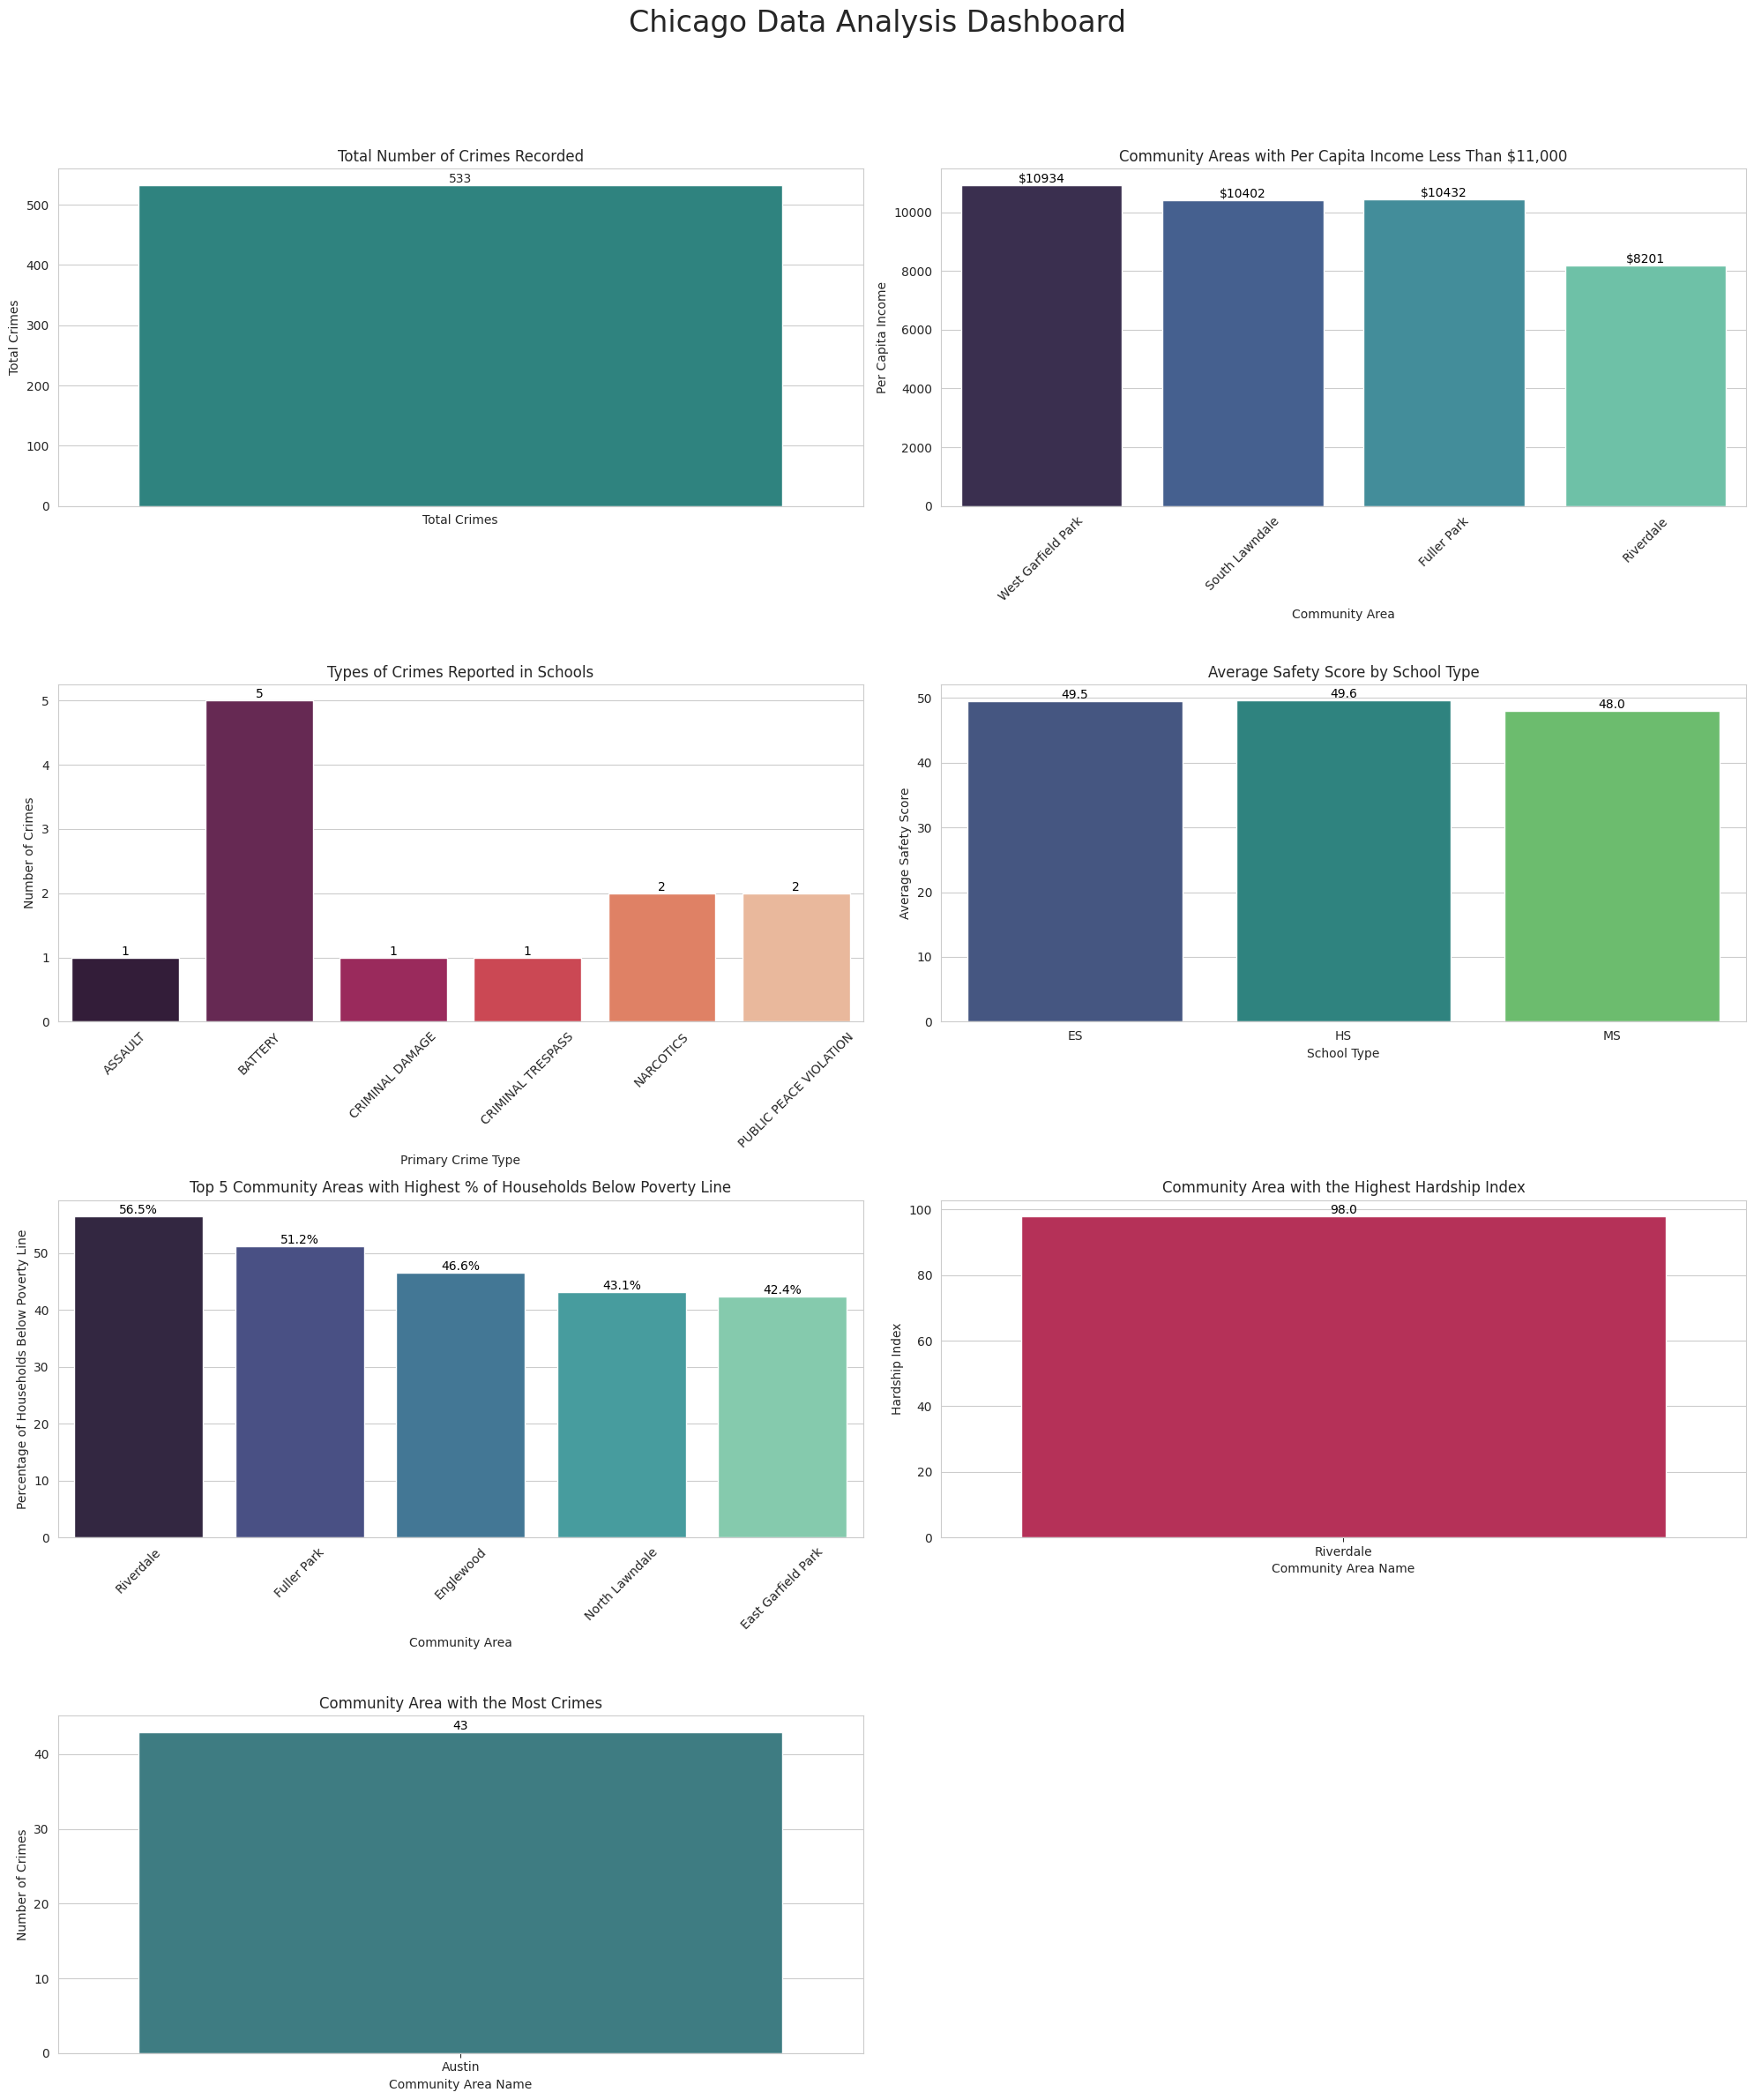

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")

# Create a figure with multiple subplots (4 rows, 2 columns for 7 plots, with one empty)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 24))
fig.suptitle('Chicago Data Analysis Dashboard', fontsize=24, y=1.02)

# 1. Bar chart for total crimes
sns.barplot(x=['Total Crimes'], y=[total_crimes], palette='viridis', hue=['Total Crimes'], legend=False, ax=axes[0, 0])
axes[0, 0].set_ylabel('Total Crimes')
axes[0, 0].set_title('Total Number of Crimes Recorded')
axes[0, 0].text(x=0, y=total_crimes, s=f'{total_crimes}', ha='center', va='bottom')

# 2. Bar chart for community areas with per capita income less than $11,000
sns.barplot(x='COMMUNITY_AREA_NAME', y='PER_CAPITA_INCOME', data=low_income_areas, palette='mako', hue='COMMUNITY_AREA_NAME', legend=False, ax=axes[0, 1])
axes[0, 1].set_xlabel('Community Area')
axes[0, 1].set_ylabel('Per Capita Income')
axes[0, 1].set_title('Community Areas with Per Capita Income Less Than $11,000')
axes[0, 1].tick_params(axis='x', labelrotation=45)
for index, row in low_income_areas.iterrows():
    axes[0, 1].text(index, row['PER_CAPITA_INCOME'], f'${row['PER_CAPITA_INCOME']}', ha='center', va='bottom', color='black')

# 3. Bar chart for types of crimes reported in schools
sns.barplot(x='PRIMARY_TYPE', y='Crime_Count', data=school_crimes_by_type, palette='rocket', hue='PRIMARY_TYPE', legend=False, ax=axes[1, 0])
axes[1, 0].set_xlabel('Primary Crime Type')
axes[1, 0].set_ylabel('Number of Crimes')
axes[1, 0].set_title('Types of Crimes Reported in Schools')
axes[1, 0].tick_params(axis='x', labelrotation=45)
for index, row in school_crimes_by_type.iterrows():
    axes[1, 0].text(index, row['Crime_Count'], f'{row['Crime_Count']}', ha='center', va='bottom', color='black')

# 4. Bar chart for average safety score by school type
sns.barplot(x='Elementary, Middle, or High School', y='Average_Safety_Score', data=school_safety_scores, palette='viridis', hue='Elementary, Middle, or High School', legend=False, ax=axes[1, 1])
axes[1, 1].set_xlabel('School Type')
axes[1, 1].set_ylabel('Average Safety Score')
axes[1, 1].set_title('Average Safety Score by School Type')
for index, row in school_safety_scores.iterrows():
    axes[1, 1].text(index, row['Average_Safety_Score'], f'{row['Average_Safety_Score']:.1f}', ha='center', va='bottom', color='black')

# 5. Bar chart for top 5 community areas with highest % of households below poverty line
sns.barplot(x='COMMUNITY_AREA_NAME', y='PERCENT_HOUSEHOLDS_BELOW_POVERTY', data=highest_poverty_areas, palette='mako', hue='COMMUNITY_AREA_NAME', legend=False, ax=axes[2, 0])
axes[2, 0].set_xlabel('Community Area')
axes[2, 0].set_ylabel('Percentage of Households Below Poverty Line')
axes[2, 0].set_title('Top 5 Community Areas with Highest % of Households Below Poverty Line')
axes[2, 0].tick_params(axis='x', labelrotation=45)
for index, row in highest_poverty_areas.iterrows():
    axes[2, 0].text(index, row['PERCENT_HOUSEHOLDS_BELOW_POVERTY'], f'{row['PERCENT_HOUSEHOLDS_BELOW_POVERTY']:.1f}%', ha='center', va='bottom', color='black')

# 6. Bar chart for community area with highest hardship index
sns.barplot(x='COMMUNITY_AREA_NAME', y='HARDSHIP_INDEX', data=highest_hardship_area, palette='rocket', hue='COMMUNITY_AREA_NAME', legend=False, ax=axes[2, 1])
axes[2, 1].set_xlabel('Community Area Name')
axes[2, 1].set_ylabel('Hardship Index')
axes[2, 1].set_title('Community Area with the Highest Hardship Index')
axes[2, 1].set_xticks([0])
axes[2, 1].set_xticklabels([highest_hardship_area['COMMUNITY_AREA_NAME'].iloc[0]])
axes[2, 1].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labelrotation=0)
axes[2, 1].text(x=0, y=highest_hardship_area['HARDSHIP_INDEX'].iloc[0], s=f'{highest_hardship_area['HARDSHIP_INDEX'].iloc[0]}', ha='center', va='bottom', color='black')

# 7. Bar chart for community area with the most crimes
sns.barplot(x='COMMUNITY_AREA_NAME', y='Crime_Count', data=most_crime_prone_area, palette='crest', hue='COMMUNITY_AREA_NAME', legend=False, ax=axes[3, 0])
axes[3, 0].set_xlabel('Community Area Name')
axes[3, 0].set_ylabel('Number of Crimes')
axes[3, 0].set_title('Community Area with the Most Crimes')
# Explicitly set the x-tick labels for single bar
axes[3, 0].set_xticks([0]) # There's only one bar, so its position is 0
axes[3, 0].set_xticklabels([most_crime_prone_area['COMMUNITY_AREA_NAME'].iloc[0]])
axes[3, 0].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labelrotation=0) # Ensure labels are visible and not rotated
axes[3, 0].text(x=0, y=most_crime_prone_area['Crime_Count'].iloc[0], s=f'{most_crime_prone_area['Crime_Count'].iloc[0]}', ha='center', va='bottom', color='black')

# Turn off the unused subplot
axes[3, 1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()

## Summary:

The dashboard insights reveal that there is a strong correlation between socioeconomic indicators and crime rates in certain Chicago community areas. I observe that areas with lower per capita income, higher percentages of households below the poverty line, and high hardship indices tend to be more vulnerable. Notably, I identify Austin as the community area with the most recorded crimes, while Riverdale exhibits significant socioeconomic distress across multiple metrics. Schools generally show consistent average safety scores across different types, but specific crime types such as Battery, Narcotics, and Public Peace Violation are present in school environments.

###Data Analysis Key Findings

* I determine that the total number of crimes
recorded in the dataset is 533.

* I find that the community area named Austin has the highest number of recorded crimes with 43 incidents.

* I identify community areas such as Riverdale, Fuller Park, South Lawndale, and West Garfield Park as having significantly low per capita incomes, all below $11,000.

* The most common crimes reported in schools are Battery (5 incidents), followed by Narcotics and Public Peace Violation (2 incidents each), while Assault, Criminal Damage, and Criminal Trespass each occurred once.

* I observe that average safety scores are consistent across Elementary, Middle, and High schools, all hovering around 48–49.

* I find that Riverdale has the highest percentage of households below the poverty line (56.5%), followed by Fuller Park (51.2%), Englewood (46.6%), North Lawndale (43.1%), and East Garfield Park (42.4%).

* I also identify Riverdale as the community area with the highest hardship index.

###Insights and Next Steps

* I plan to investigate the specific factors contributing to high crime rates in areas like Austin and the concentrated socioeconomic distress in communities such as Riverdale and Fuller Park, potentially informing targeted intervention programs.

* I will analyze the relationship between specific types of crimes reported in schools and broader community crime trends to inform school safety policies and community-based crime prevention strategies.



## Summary of Dashboard Insights

Based on the visualizations created, here are some key insights:

1.  **Total Crimes**: The total number of crimes recorded in the dataset is 533.

2.  **Community Areas with Low Per Capita Income**: Community areas like Riverdale, Fuller Park, South Lawndale, and West Garfield Park show significantly lower per capita incomes (below $11,000), indicating potential economic hardship in these regions.

3.  **Types of Crimes in Schools**: The most common crimes reported in schools are Battery (5 incidents), followed by Narcotics and Public Peace Violation (2 incidents each). Assault, Criminal Damage, and Criminal Trespass each occurred once.

4.  **Average School Safety Scores by Type**: There isn't a significant difference in average safety scores across school types (Elementary, Middle, or High School). All three types hover around an average safety score of 48-49.

5.  **Community Areas with High Poverty Rates**: Riverdale stands out with the highest percentage of households below the poverty line (56.5%), followed by Fuller Park (51.2%), Englewood (46.6%), North Lawndale (43.1%), and East Garfield Park (42.4%). These areas align with those identified with low per capita income, highlighting areas of concentrated economic distress.

6.  **Community Area with Highest Hardship Index**: Riverdale is identified as the community area with the highest hardship index, reinforcing its status as an economically vulnerable area.

7.  **Community Area with Most Crimes**: Austin is the community area with the highest number of recorded crimes (43 incidents) within this dataset.